# T4 - IIC2613 | Inteligencia Artificial
## Aprendizaje de Máquina

Fecha de entrega: Jueves 13 de Junio de 2024 a las 23:59 hrs.

*Recuerda que todas tus resupuestas (tanto teoricas como de codigo) deben ir en este notebook, el cual debe ser subido a tu repositorio de GitHub antes de la fecha de entrega.*

Las respuestas teoricas deberan estar completadas en celdas de Markdown debajo de su pregunta respectiva, ademas, se solicita que todas las celdas del notebook se encuentren ejecutadas a la hora de su entrega.

---

# Parte 1: Reflexión (2 pts.)

Esta sección de la tarea consiste en una serie de preguntas de reflexión que tendrás que responder basándote en el podcast de la profesora Jocelyn Dunstan ["Ciencia de Datos con Jocelyn Dunstan"](https://open.spotify.com/show/4h0tWwoeer64BAz2mfW2pt?si=d2db3ab40ebc4fd2) que está disponible en Spotify. Escucha uno a mas capítulos del podcast y escoge un episodio para contestar las siguientes preguntas:

<p align="center">
    <img src="https://i.scdn.co/image/ab6765630000ba8a48be458b1c3392d7c716d150" alt="Logo del Podcast 'Ciencia de Datos' de Jocelyn Dunstan" width="20%">
</p>

### 1.1 ¿Por qué escogiste este episodio?
Escogí el episodio "Las señales de la voz" porque aborda un tema fascinante en la intersección de la ingeniería biomédica, el reconocimiento de voz y la fonología. La voz humana no solo es un medio de comunicación, sino también una fuente rica de datos que puede proporcionar información valiosa sobre la salud y el bienestar de una persona. Este episodio me llamó la atención por su potencial impacto en la mejora de tecnologías de reconocimiento de voz y aplicaciones en salud, así como por su relevancia en conectar la investigación en Chile con el ámbito internacional.

### 1.2 ¿Cuál crees que es la relevancia del tema tratado en el capítulo dentro del campo de la inteligencia artificial, machine learning o ciencia de datos?
El análisis de la voz, tal como se discute en el episodio, tiene una relevancia considerable en varios aspectos de la inteligencia artificial (IA), machine learning y ciencia de datos. En primer lugar, el reconocimiento de voz es una aplicación crucial de la IA, que permite la interacción natural entre humanos y máquinas. Tecnologías como los asistentes virtuales (por ejemplo, Siri, Alexa, Google Assistant) dependen de algoritmos avanzados de reconocimiento de voz para entender y responder a los comandos de los usuarios. La capacidad de capturar y procesar señales de voz de manera precisa y eficiente es fundamental para mejorar la usabilidad y la eficacia de estas herramientas.

Además, el análisis de la voz tiene aplicaciones significativas en la salud, específicamente en la ingeniería biomédica. Las características de la voz pueden proporcionar indicadores tempranos de diversas condiciones de salud, incluyendo trastornos neurológicos, enfermedades respiratorias y problemas de salud mental como la depresión y la ansiedad. Por ejemplo, cambios en el tono, la entonación y el ritmo del habla pueden ser señales de problemas de salud que pueden ser monitoreados a través de algoritmos de machine learning. Esto permite la creación de sistemas de monitoreo no invasivos y en tiempo real, que pueden mejorar la capacidad de los profesionales de la salud para detectar y tratar enfermedades de manera más temprana y efectiva.

Otro aspecto relevante es la capacidad de estas tecnologías para conectar la investigación local con el ámbito internacional. Como menciona Matías Zañartu, la integración de herramientas electrónicas y el análisis de señales capturadas por sensores pueden facilitar colaboraciones globales y la aplicación de avances tecnológicos en contextos locales. Esto es particularmente importante en países como Chile, donde el acceso a tecnologías avanzadas puede ser limitado. Al utilizar IA y machine learning para analizar las señales de voz, los investigadores pueden desarrollar soluciones innovadoras que se adapten a las necesidades específicas de sus comunidades, mejorando así la calidad de vida de las personas.

### 1.3 Busca al menos una referencia externa que enriquezca alguna idea mencionada en el capítulo y discute.
Una referencia relevante es el artículo "Voice-based monitoring of depression and anxiety" publicado en la revista npj Digital Medicine en 2019. Este estudio explora cómo las características acústicas de la voz pueden ser utilizadas para monitorear estados de salud mental como la depresión y la ansiedad. Los investigadores encontraron que ciertos parámetros de la voz, como la entonación y el ritmo, pueden cambiar significativamente en presencia de estos trastornos.

En relación con lo discutido por Matías Zañartu en el podcast, este estudio refuerza la idea de que las señales de voz son una fuente valiosa de datos biomédicos. La aplicación de técnicas de machine learning para analizar estas señales puede llevar a innovaciones significativas en el campo de la salud, permitiendo un monitoreo continuo y no invasivo de pacientes. Esto no solo mejora la accesibilidad a los servicios de salud, sino que también facilita una intervención temprana, potencialmente salvando vidas y reduciendo costos en el sistema de salud​​.

Esta conexión entre el análisis de la voz y su aplicación en la salud subraya la importancia de integrar la electrónica y las herramientas de machine learning en la captura y procesamiento de señales de voz. La colaboración entre disciplinas y la conexión de la investigación local con la global, como menciona Zañartu, es crucial para avanzar en este campo y desarrollar soluciones innovadoras y efectivas.

---

# Parte 2: DCClasificador de Sismos (4 pts)

El objetivo de esta actividad es entrenar algoritmos de clasificacion y regresion para estimar la posibilidad de tsunami y magnitud en grados richter de un sismo dada informacion sobre este.

Para llevar esto a cabo se dispone de una base de datos que contiene todos los sismos entre los años 1990 y 2023 (mas de 3.5M de muestras), de la cual se ha tomado un segmento de ~10.000 muestras para poder implementar algoritmos de aprendizaje supervisado. El set de datos original se encuentra disponible en [Kaggle](https://www.kaggle.com/datasets/alessandrolobello/the-ultimate-earthquake-dataset-from-1990-2023), junto con el detalle sobre sus contenidos.

## Importar librerías
Recuerda haber instalado previamente las librerias `numpy`, `pandas`, `scikit-learn`, `matplotlib` y `seaborn`.

In [1]:
# Las siguientes librerias nos permiten el trabajo de los datos
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Las siguientes librerias nos permiten la visualización de los datos
import seaborn as sns
import matplotlib.pyplot as plt

# Las siguientes funciones nos permiten medir el desempeño de los modelos
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Importamos las clases para clasificación
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Importamos las clases para regresión
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

## 2.1 Lectura y estudio de los datos

### 2.1.1 Carga de los datos

Carga los datos del archivo `earthquakes.csv` utilizando la librería de procesamiento de datos [pandas](https://pandas.pydata.org/docs/). Comenta sobre los elementos que contiene, para esto debes investigar la fuente de los datos y visualizarlos con pandas para su entendimiento.

In [2]:
import pandas as pd

# Cargar el archivo CSV doblando las barras invertidas
df = pd.read_csv('C:\\Users\\USER\\Desktop\\T4-main\\earthquakes.csv', encoding='utf-8')

# Visualizar los datos
print(df.head())
print(df.describe())
print(df.info())

            time                              place    status  tsunami  \
0   746378873660           70 km WNW of Yakutat, AK  reviewed        0   
1  1574384878869      3 km S of Point MacKenzie, AK  reviewed        1   
2   636670273060  70 km ESE of Khand?d, Afghanistan  reviewed        0   
3   649952770970     21 km ENE of Jurm, Afghanistan  reviewed        0   
4   667312403790     68 km SSW of Jurm, Afghanistan  reviewed        0   

   significance   data_type  magnitude         state  longitude  latitude  \
0            39  earthquake        1.6            AK  -140.8333   59.8255   
1           334  earthquake        4.0            AK  -149.9808   61.3339   
2           500  earthquake        5.7   Afghanistan    73.0610   36.7380   
3           271  earthquake        4.2   Afghanistan    71.0690   36.9060   
4           465  earthquake        5.5   Afghanistan    70.6450   36.2700   

   depth                              date  days_since_last  
0   -3.0  1993-08-26 15:27:53.

### 2.1.2 Descripcion de los datos

Utiliza los metodos [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) y [`count()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html) de la clase `DataFrame` de Pandas para realizar un análisis inicial de los datos. Indica la cantidad de datos con los que se está trabajando, el tipo de datos presentes y cualquier otra información que consideres relevante. 

Una de las actividades en esta tarea consiste en predecir la posibilidad de un tsunami dada el resto de la informacion recompilada de un sismo, indica que columna usaremos de etiqueta y por qué es importante mantenerla oculta al momento de testear la clasificación. 

In [3]:
# Descripción estadística de los datos
descripcion_estadistica = df.describe()
print("\nDescripción estadística:")
print(descripcion_estadistica)

# Contar los datos no nulos por columna
conteo_datos = df.count()
print("\nConteo de datos no nulos por columna:")
print(conteo_datos)

# Información del DataFrame
info_df = df.info()
print("\nInformación del DataFrame:")
print(info_df)



Descripción estadística:
               time       tsunami  significance     magnitude     longitude  \
count  1.062600e+04  10626.000000  10626.000000  10626.000000  10626.000000   
mean   1.243734e+12      0.143798    312.825993      3.843240    -41.330382   
std    2.980132e+11      0.350902    287.365818      2.092006    120.699477   
min    6.312348e+11      0.000000      0.000000      0.010000   -179.997000   
25%    1.018000e+12      0.000000     68.000000      2.100000   -130.389175   
50%    1.287970e+12      0.000000    259.000000      4.100000   -110.892833   
75%    1.500852e+12      0.000000    487.750000      5.500000     94.698750   
max    1.690375e+12      1.000000   2910.000000      9.100000    179.999300   

           latitude         depth  days_since_last  
count  10626.000000  10626.000000     10148.000000  
mean      24.077632     46.629465       168.146236  
std       30.392755     95.510057       581.159374  
min      -69.773900     -3.380000         0.000000

### 2.1.3 Desbalance de clases

Investiga sobre qué es el balance/desbalance de clases, cómo puede afectar este a un algoritmo clasificador e indica alguna tecnica para contrarrestar el desbalance en problemas de clasificacion. Finalmente, indica la distribución de datos por clase, si están balanceados o no y cómo esto podría beneficiar/afectar al rendimiento de los modelos que entrenaremos en esta tarea.

(*Hint: Usar el metodo [`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) para una columna de un DataFrame nos retorna el numero de instancias por clase, tambien se recomienda graficar [el histograma de frecuencias por valor](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html)*)


El balance de clases se refiere a una distribución equitativa de instancias entre las diferentes clases en un conjunto de datos. En contraste, un desbalance de clases ocurre cuando una o más clases tienen significativamente más instancias que otras.

Un desbalance de clases puede afectar negativamente el rendimiento de un algoritmo clasificador de varias maneras:
Desempeño sesgado: Los clasificadores pueden volverse sesgados hacia la clase mayoritaria, prediciendo incorrectamente la clase minoritaria.
Métricas engañosas: Métricas como la exactitud pueden ser engañosas, ya que un clasificador que predice siempre la clase mayoritaria puede parecer preciso.
Menor capacidad de generalización: El clasificador puede tener dificultades para generalizar adecuadamente a nuevos datos, especialmente en la predicción de la clase minoritaria.

Existen varias técnicas para abordar el desbalance de clases en problemas de clasificación:
Submuestreo de la clase mayoritaria: Reducir el número de instancias en la clase mayoritaria para equilibrar el conjunto de datos.
Sobremuestreo de la clase minoritaria: Aumentar el número de instancias en la clase minoritaria mediante replicación o generación de nuevas instancias sintéticas, como con el algoritmo SMOTE (Synthetic Minority Over-sampling Technique).
Métodos de ensemble: Utilizar métodos como Random Forest o Boosting que pueden manejar mejor el desbalance de clases.
Ajuste de pesos: Modificar el algoritmo de clasificación para penalizar más los errores en la clase minoritaria, ajustando los pesos de las clases en la función de pérdida.


Distribución de datos por clase en la columna 'tsunami':
tsunami
0    9098
1    1528
Name: count, dtype: int64


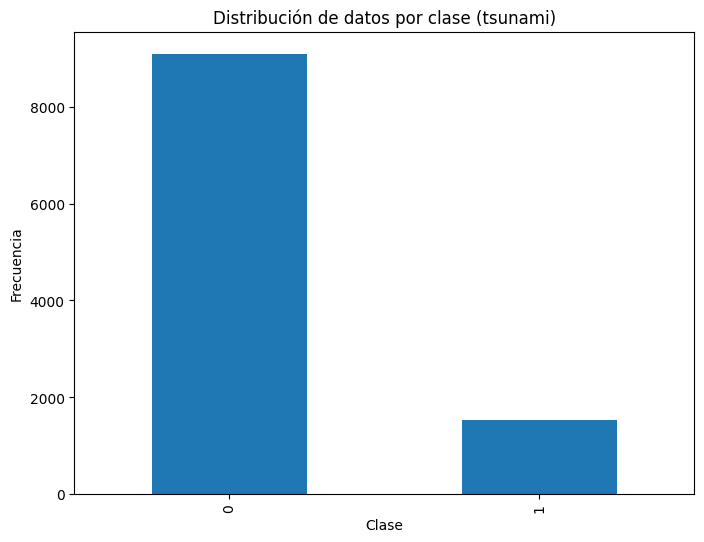


Las clases están desbalanceadas.


In [4]:
distribucion_clases = df['tsunami'].value_counts()
print("Distribución de datos por clase en la columna 'tsunami':")
print(distribucion_clases)

# Graficar el histograma de frecuencias por valor
plt.figure(figsize=(8, 6))
df['tsunami'].value_counts().plot(kind='bar')
plt.title('Distribución de datos por clase (tsunami)')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()
# Comprobar si las clases están balanceadas
if distribucion_clases.min() / distribucion_clases.max() < 0.5:
    balance_status = "Las clases están desbalanceadas."
else:
    balance_status = "Las clases están balanceadas."

print(f"\n{balance_status}")

## 2.2 Preprocesamiento de datos

En esta sección, deberás llevar a cabo un tratamiento de los datos para garantizar que los clasificadores puedan ser entrenados de manera adecuada. Es importante resaltar que todas las decisiones que tomes deberán estar debidamente justificadas. Para comenzar responde a las preguntas:

¿Por qué es importante preprocesar los datos y cómo puede esto afectar a nuestro problema de clasificación?

El preprocesamiento de datos es crucial en problemas de clasificación, ya que mejora la calidad y la relevancia de los datos para el modelo, asegurando un rendimiento óptimo y una mejor capacidad de generalización. Procesos como la imputación de valores faltantes, la normalización y el escalado de características, la transformación de datos categóricos y el balanceo de clases mediante técnicas como SMOTE son esenciales. Estas técnicas ayudan a evitar sesgos, mejorar la precisión y asegurar que las características contribuyan de manera justa en el modelo. Sin un preprocesamiento adecuado, el modelo puede volverse sesgado, ineficaz y proporcionar resultados engañosos, especialmente en conjuntos de datos con desbalances de clases.

### 2.2.1 Muestreo de datos

Los datos cargados corresponden a un segmento de un [set de datos mas grande sobre terremotos a lo largo del mundo](https://www.kaggle.com/datasets/alessandrolobello/the-ultimate-earthquake-dataset-from-1990-2023), el set de datos original tiene 3.5 millones de filas pero solamente unas 10.000 fueron extraidas, guardando todas las muestras con tsunami (debido a lo poco frecuente de la clase) y tratando de balancear la magnitud de un terremoto para no tener sobrerepresentacion de algunos valores. A continuacion se muestra un grafico de la distribucion (normalizada) de la columna `magnitude` antes y despues de muestrear el set original:

<p align="center">
    <img src="https://gcdnb.pbrd.co/images/3nA2jNg0zXv9.png?o=1" alt="Distribucion de la columna magnitud en el set de datos original vs la muestra" width="25%">
</p>

En caso de que hubiesemos dispuesto de pocos datos originalmente ¿qué técnicas podrías usar para enriquecer el dataset? Investiga en internet y reporta al menos dos metodologias.

Algunas técnicas para enriquecer el dataset incluyen:

Data Augmentation: Generar nuevas muestras basadas en las muestras existentes. Esta técnica es muy común en el procesamiento de imágenes, por ejemplo, rotando las imágenes, recortándolas, etcétera.
Síntesis de datos: Generación de nuevas muestras sintéticas para manejar el desbalance de clases.

### 2.2.2 Valores nulos

Revisa si el nuevo DataFrame contiene valores nulos ([NaN](https://pandas.pydata.org/docs/reference/api/pandas.isna.html)). En caso afirmativo, deberás tomar la decisión de eliminar las filas o columnas que contengan estos datos nulos, o si prefieres, reemplazar estos con algún otro valor. Si no existen valores nulos, indícalo. ¿Por qué es importante manejar este tipo de valores?.

In [5]:
# Revisar si hay valores nulos en el DataFrame
valores_nulos = df.isna().sum()
print("Cantidad de valores nulos por columna:")
print(valores_nulos)

# Verificar si hay valores nulos en el DataFrame
hay_nulos = valores_nulos.any()
if hay_nulos:
    print("\nExisten valores nulos en el DataFrame.")
else:
    print("\nNo existen valores nulos en el DataFrame.")


Cantidad de valores nulos por columna:
time                 0
place                0
status               0
tsunami              0
significance         0
data_type            0
magnitude            0
state                0
longitude            0
latitude             0
depth                0
date               176
days_since_last    478
dtype: int64

Existen valores nulos en el DataFrame.


In [6]:
if hay_nulos:
    print("\nExisten valores nulos en el DataFrame.")
else:
    print("\nNo existen valores nulos en el DataFrame.")

# Si existen valores nulos, tomamos la decisión de manejarlos
if hay_nulos:
    # Reemplazar valores nulos con la media de cada columna numérica
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        mean_value = df[column].mean()
        df[column] = df[column].fillna(mean_value)
    
    # Manejar valores nulos en columnas no numéricas
    for column in df.select_dtypes(include=['object', 'datetime']).columns:
        mode_value = df[column].mode()[0]
        df[column] = df[column].fillna(mode_value)
    
    # Verificar nuevamente si quedan valores nulos
    valores_nulos_despues = df.isna().sum()
    print("\nCantidad de valores nulos por columna después del reemplazo:")
    print(valores_nulos_despues)

    if valores_nulos_despues.any():
        print("\nAún quedan valores nulos en el DataFrame. Requiere una inspección más detallada.")
    else:
        print("\nTodos los valores nulos han sido reemplazados.")
else:
    print("\nNo es necesario manejar valores nulos, ya que no existen en el DataFrame.")


Existen valores nulos en el DataFrame.

Cantidad de valores nulos por columna después del reemplazo:
time               0
place              0
status             0
tsunami            0
significance       0
data_type          0
magnitude          0
state              0
longitude          0
latitude           0
depth              0
date               0
days_since_last    0
dtype: int64

Todos los valores nulos han sido reemplazados.


Es importante manejar este tipo de valores debido a que se debe mantener la integridad de los datos, mejorar la precisión y también buscar evitar errores en el modelo.

### 2.2.3 Variables categoricas y encoding

¿Qué son las variables categóricas? ¿Hay este tipo de variables en este conjunto de datos? Explica cómo se pueden manejar estas y en caso de haberlas realiza un desarrollo para poder entrenar los algoritmos correctamente.

Se recomienda **fuertemente** revisar [el siguiente link](https://medium.com/geekculture/machine-learning-one-hot-encoding-vs-integer-encoding-f180eb831cf1) sobre metodos de encoding.

Las variables categóricas son aquellas que contienen valores que pertenecen a categorías o grupos distintos, en lugar de valores numéricos continuos. Ejemplos de variables categóricas incluyen el color de un objeto (rojo, azul, verde), el tipo de producto (electrónica, ropa, alimentos), o la clasificación de una película (acción, comedia, drama).


Sí, hay variables categóricas: place, status, data_type, state. Estas variables categóricas pueden ser manejadas a partir de:

Las variables categóricas deben ser transformadas en una forma que los algoritmos de Machine Learning puedan procesar. Existen varios métodos para realizar esta transformación:

One-Hot Encoding: Transforma cada categoría en una columna binaria separada.
Label Encoding: Asigna un número entero único a cada categoría.
Target Encoding: Sustituye cada categoría por la media de la variable objetivo.




columnas_categoricas = ['place', 'status', 'data_type', 'state'] 

encoder = OneHotEncoder(sparse=False, drop='first')
encoded_data = encoder.fit_transform(df[columnas_categoricas])

# Crear un DataFrame con las columnas codificadas
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names(columnas_categoricas))

# Concatenar el DataFrame original con el DataFrame codificado
df = pd.concat([df.drop(columns=columnas_categoricas), encoded_df], axis=1)
print(df.head())

Básicamente el código de arriba permite añadir las columnas categóricas a la variable denominada "columnas categóricas" y luego se utiliza el "OneHotEncoder" para así convertir estas columnas categóricas en variables binarias. 

### 2.2.4 Limpieza de los datos

Elimina las columnas que no consideres necesarias o que creas que no aportan información relevante para realizar la clasificación. Debes justificar por qué eliminas cada columna. Responde a la pregunta ¿Cómo pueden afectar columnas con información no relevante al modelo de clasificación?

Se recomienda **fuertemente** usar la funcion [`pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html) de [Seaborn](https://seaborn.pydata.org/index.html) para visualizar la correlacion entre caracteristicas, aunque recuerda que **correlacion no siempre implica causalidad**.

Las columnas son no necesarias para la clasificación:
* data_type: Debido a que los registros son del mismo tipo y no añade ni quita valor al modelo.
* Time y date: Porque puede que den más complejidad de la necesaria al modelo, sin aportar información realmente útil.
* Place y State: Considero que estas columnas son redundantes debido a que se tiene longitude y latitude, o sea que la geolocalización ya está representada.
* days_since_last: No considero que sea relevante.

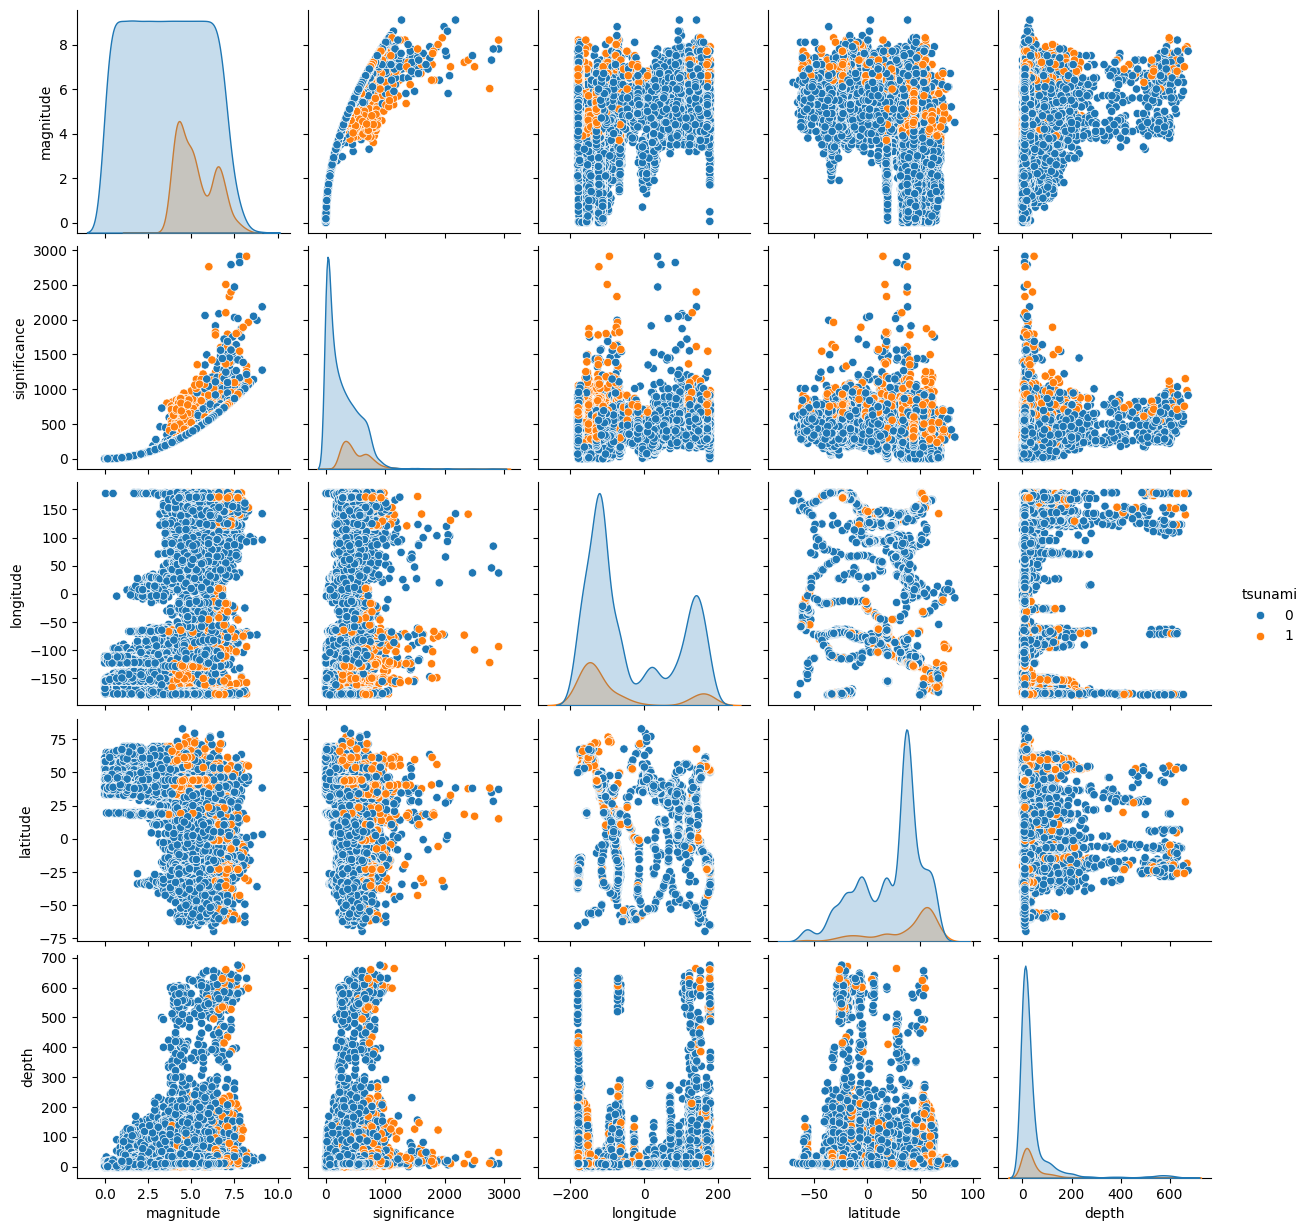

In [7]:
# Seleccionar columnas relevantes para la visualización
columns_to_visualize = ['magnitude', 'significance', 'longitude', 'latitude', 'depth', 'tsunami']

# Crear un pairplot
sns.pairplot(df[columns_to_visualize], hue='tsunami')
plt.show()

In [8]:
# Eliminar columnas no relevantes
df_cleaned = df.drop(columns=['time', 'date', 'place', 'state', 'data_type', 'days_since_last'])

# Verificar el DataFrame resultante
print(df_cleaned.head())

     status  tsunami  significance  magnitude  longitude  latitude  depth
0  reviewed        0            39        1.6  -140.8333   59.8255   -3.0
1  reviewed        1           334        4.0  -149.9808   61.3339   46.6
2  reviewed        0           500        5.7    73.0610   36.7380   10.0
3  reviewed        0           271        4.2    71.0690   36.9060   33.0
4  reviewed        0           465        5.5    70.6450   36.2700  154.7


Las columnas con información no relevante pueden afectar el rendimiento del modelo al aportar ruido, haciendo el modelo menos preciso. Además, tener más columnas implica más datos para procesar, aumentando el tiempo de entrenamiento y la complejidad del modelo.

### 2.2.5 Separacion en conjuntos de entrenamiento/testeo

Nos importa que tanto nuestro set de entrenamiento como nuestro set de testeo sea igual de representativos de la distribucion de los datos, por lo que tomaremos en consideracion esto a la hora de separar los datos en train/test. Afortunadamente, la funcion [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de [SciKit Learn](https://scikit-learn.org/stable/index.html) nos permite llevar esto a cabo mediante su atributo `stratify`. Usaremos un 20% de los datos para evaluar nuestros modelos.

Dado que queremos que ambos set de datos contengan la misma proporcion de datos de la columna `tsunami`, la pasaremos de argumento para llevar a cabo la separacion, como se muestra a continuacion:

In [9]:
# Dividir los datos en conjuntos de entrenamiento y prueba, estratificando por la columna 'tsunami'
X_train, X_test = train_test_split(df_cleaned, test_size=0.2, random_state=42, stratify=df_cleaned['tsunami'])


### 2.2.6 Definicion de etiquetas

Como se mencionó anteriormente, en esta tarea llevaremos a cabo dos tareas sobre el set de datos: clasificación de tsunamis y regresión de la magnitud de un sismo utilizando información externa sobre este. Por tanto, deberás separar las columnas tsunami y magnitude del set de datos para utilizarlas como vectores de etiquetas $\vec{y}$ para tus clasificadores.

Dentro de este apartado se espera que tengas 2 matrices y 4 vectores:

X_train y X_test: Matrices que contienen la información sobre cada sismo (excepto las columnas tsunami y magnitude).
y_train_tsunami y y_test_tsunami: Vectores de entrenamiento y evaluación que contienen un 0 para sismos sin tsunamis y un 1 para aquellos que sí.
y_train_magnitude y y_test_magnitude: Vectores de entrenamiento y evaluación que contienen la magnitud para cada sismo dentro de X_train y X_test respectivamente.

In [10]:
df_cleaned.to_csv('earthquakes_cleaned.csv', index=False, encoding='utf-8')
df_cleaned = pd.read_csv('earthquakes_cleaned.csv', encoding='utf-8')

# Definir las matrices de características y los vectores de etiquetas
X = df_cleaned.drop(columns=['tsunami', 'magnitude'])
y_tsunami = df_cleaned['tsunami']
y_magnitude = df_cleaned['magnitude']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_tsunami, y_test_tsunami = train_test_split(
    X, y_tsunami, test_size=0.2, random_state=42, stratify=y_tsunami
)

# Dividir los vectores de magnitud de manera correspondiente
_, _, y_train_magnitude, y_test_magnitude = train_test_split(
    X, y_magnitude, test_size=0.2, random_state=42, stratify=y_tsunami
)

# Verificar las dimensiones de los conjuntos
print("Dimensiones del conjunto de entrenamiento (X_train):", X_train.shape)
print("Dimensiones del conjunto de prueba (X_test):", X_test.shape)
print("Dimensiones del vector de entrenamiento (y_train_tsunami):", y_train_tsunami.shape)
print("Dimensiones del vector de prueba (y_test_tsunami):", y_test_tsunami.shape)
print("Dimensiones del vector de entrenamiento (y_train_magnitude):", y_train_magnitude.shape)
print("Dimensiones del vector de prueba (y_test_magnitude):", y_test_magnitude.shape)


Dimensiones del conjunto de entrenamiento (X_train): (8500, 5)
Dimensiones del conjunto de prueba (X_test): (2126, 5)
Dimensiones del vector de entrenamiento (y_train_tsunami): (8500,)
Dimensiones del vector de prueba (y_test_tsunami): (2126,)
Dimensiones del vector de entrenamiento (y_train_magnitude): (8500,)
Dimensiones del vector de prueba (y_test_magnitude): (2126,)


### 2.2.7 Normalizacion de los datos

¿Qué es la normalización de datos y por qué puede ser beneficioso realizarla para un problema de clasificación? ¿Existe alguna columna que pueda ser conveniente normalizar? En caso de haberla utiliza algún algoritmo de normalización, si no justifica por qué no es conveniente realizar dicha operación.

Es importante que la obtencion de parametros para normalizacion de los datos se lleva a cabo en el conjunto de entrenamiento y luego se aplica sobre el de evaluacion, si utilizas [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) de sklearn, deberas hacer ajuste del scaler (usando `.fit()`) sobre la columna en el conjunto de entrenamiento y luego hacer `.transform()` sobre ambos conjuntos.

La normalización de datos sirve para ajustar los valores de las características de los datos a una escala común. Esto sirve principalmente para mejorar el rendimiento de los algoritmos, especialmente aquellos que calculan distancias o realizan algún tipo de regresión.

En el conjunto de datos dado, las columnas "longitude", "latitude" y "depth" son columnas que podrían ser normalizadas ya que pueden tener diferentes escalas.

In [11]:
from sklearn.preprocessing import StandardScaler

# Columnas a normalizar
columns_to_normalize = ['longitude', 'latitude', 'depth']

# Inicializar el StandardScaler
scaler = StandardScaler()

# Ajustar el scaler en el conjunto de entrenamiento y transformar
X_train[columns_to_normalize] = scaler.fit_transform(X_train[columns_to_normalize])

# Transformar el conjunto de prueba con el mismo scaler
X_test[columns_to_normalize] = scaler.transform(X_test[columns_to_normalize])

# Verificar los resultados
print("Media y desviación estándar de las columnas normalizadas en el conjunto de entrenamiento:")
print(X_train[columns_to_normalize].mean(axis=0))
print(X_train[columns_to_normalize].std(axis=0))

print("\nMedia y desviación estándar de las columnas normalizadas en el conjunto de prueba:")
print(X_test[columns_to_normalize].mean(axis=0))
print(X_test[columns_to_normalize].std(axis=0))


Media y desviación estándar de las columnas normalizadas en el conjunto de entrenamiento:
longitude    1.253899e-17
latitude     4.869308e-17
depth        6.018715e-17
dtype: float64
longitude    1.000059
latitude     1.000059
depth        1.000059
dtype: float64

Media y desviación estándar de las columnas normalizadas en el conjunto de prueba:
longitude   -0.025054
latitude     0.027263
depth       -0.025113
dtype: float64
longitude    0.982663
latitude     0.993992
depth        0.972041
dtype: float64


## 2.3 Explorando los algoritmos de un problema de clasificación

Responde las siguientes preguntas de análisis para un problema de clasificación y los algoritmos que se utilizan para estos:

### 2.3.1 Nociones basicas
¿Cuál es el principal objetivo de un problema de clasificación?

El principal objetivo de un problema de clasificación es asignar correctamente una etiqueta o clase a cada instancia del conjunto de datos basado en sus características. En otras palabras, se busca desarrollar un modelo que pueda predecir la clase a la que pertenece una nueva instancia de datos no vista anteriormente, utilizando la información aprendida durante el entrenamiento con datos etiquetados. Este proceso es fundamental para diversas aplicaciones, como la detección de spam, el diagnóstico médico, la categorización de correos electrónicos, y muchos otros campos donde es crucial clasificar datos de manera precisa y eficiente

### 2.3.2 Ejemplos practicos
¿Qué casos de uso comunes de clasificación existen en el mundo real? ¿Qué impacto pueden tener estos en las personas? Menciona al menos 3.

Aquí tienes otros tres casos de uso comunes de clasificación en el mundo real:

Recomendaciones de Productos: Utilizadas por plataformas de comercio electrónico como Amazon para clasificar y recomendar productos a los usuarios en función de su historial de compras y comportamiento de navegación. Esto mejora la experiencia del cliente y aumenta las ventas al ofrecer productos relevantes y personalizados.

Clasificación de Documentos: Empleada en empresas y organizaciones para clasificar grandes volúmenes de documentos y correos electrónicos, facilitando la organización y la recuperación de información. Esto incrementa la eficiencia operativa y reduce el tiempo y esfuerzo necesarios para gestionar la documentación.

Reconocimiento de Voz: Utilizado en asistentes virtuales como Siri, Alexa y Google Assistant para clasificar y entender comandos de voz. Esto mejora la interacción humano-computadora, permitiendo a los usuarios realizar tareas mediante comandos de voz de manera más natural y eficiente.

### 2.3.3 Desafios e impacto
¿Qué relevancia e impacto puede tener el éxito o fracaso de este problema de clasificación en la vida real? ¿De qué modo un algoritmo de clasificación como este podría beneficiar a la sociedad chilena para prepararse ante desastres naturales?

El éxito de un problema de clasificación es crucial ya que puede mejorar la eficiencia y seguridad, mientras que su fracaso puede llevar a errores costosos y riesgos. En Chile, un algoritmo de clasificación puede tener un impacto significativo en la preparación y respuesta ante desastres naturales al permitir la detección temprana y emisión de alertas, priorizar recursos de rescate, y ayudar en la planificación de infraestructuras seguras. Esto puede salvar vidas, minimizar daños materiales y aumentar la resiliencia comunitaria, optimizando así la capacidad del país para enfrentar y recuperarse de eventos catastróficos.

### 2.3.4 Seleccion de algoritmos
¿Cuáles son los factores que deberían influir en la elección de un algoritmo de clasificación para un conjunto de datos determinado?

La elección de un algoritmo de clasificación para un conjunto de datos determinado debe considerar varios factores clave:

Naturaleza de los Datos: La estructura y tipo de datos (categóricos, numéricos, textuales) y su dimensionalidad pueden determinar qué algoritmos son más apropiados. Por ejemplo, SVM y KNN son adecuados para datos numéricos, mientras que Naive Bayes puede ser mejor para datos textuales.

Balance de Clases: En problemas con desbalance de clases, algoritmos como Random Forest o técnicas de ensemble pueden manejar mejor esta situación que otros como KNN.

Tamaño del Conjunto de Datos: Algoritmos como KNN pueden ser computacionalmente intensivos en grandes conjuntos de datos, mientras que métodos como Logistic Regression o Naive Bayes pueden ser más eficientes.

Interpretabilidad del Modelo: Dependiendo del caso de uso, puede ser crucial entender y explicar las decisiones del modelo, lo cual es más sencillo con modelos como Decision Trees o Logistic Regression, en comparación con modelos más complejos como Deep Learning.

Precisión y Robustez: Algunos algoritmos, como Random Forest y Boosting, tienden a ofrecer alta precisión y robustez frente a overfitting, siendo preferibles en contextos donde la precisión es crítica.

Tiempo de Entrenamiento y Predicción: El tiempo requerido para entrenar el modelo y hacer predicciones puede ser un factor decisivo, especialmente en aplicaciones en tiempo real, donde algoritmos más rápidos como Naive Bayes pueden ser preferidos.

Disponibilidad de Recursos Computacionales: La elección del algoritmo también puede depender de los recursos computacionales disponibles, ya que modelos complejos como las redes neuronales requieren más potencia de procesamiento y memoria.

Considerar estos factores ayuda a seleccionar el algoritmo que no solo se ajuste mejor a las características del conjunto de datos, sino que también cumpla con los requisitos específicos del problema a resolver.

### 2.3.5 Definicion de hiperparametros
¿Qué son los hiperparámetros y cómo estos podrían afectar al rendimiento de un modelo de clasificación?

Los hiperparámetros son configuraciones externas al modelo establecidas antes del entrenamiento que controlan el comportamiento del algoritmo y su capacidad para generalizar. Ejemplos incluyen la tasa de aprendizaje, la profundidad de un árbol de decisión y el número de vecinos en KNN. Estos hiperparámetros afectan el rendimiento del modelo al influir en el balance entre sobreajuste (overfitting) y subajuste (underfitting), el tiempo de entrenamiento y predicción, y la capacidad de generalización. Un ajuste adecuado de los hiperparámetros mediante técnicas como Grid Search o Random Search puede mejorar significativamente la precisión y robustez del modelo, mientras que una configuración incorrecta puede llevar a un rendimiento deficiente y tiempos de entrenamiento prolongados.



## 2.4 Implementación de Clasificadores

Utilizando el DataFrame con los datos ya preprocesados, deberás entrenar cuatro modelos distintos. Para esto, se deben entrenar los clasificadores de KNN, árboles de decisión, Random Forest y SVM utilizando sus implementaciones de sklearn.

*En esta seccion solo debes hacer el ajuste de los modelos, el calculo de metricas de desempeño sera llevado a cabo en el apartado siguiente.* 

In [12]:
data_path = 'earthquakes_cleaned.csv'
df = pd.read_csv(data_path)
X = df.drop(['tsunami', 'magnitude'], axis=1)
y_tsunami = df['tsunami']
categorical_columns = X.select_dtypes(include=['object']).columns

# Realizar One-Hot Encoding de las columnas categóricas
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Dividir en conjuntos de entrenamiento y prueba, estratificando por la columna 'tsunami'
X_train, X_test, y_train_tsunami, y_test_tsunami = train_test_split(X_encoded, y_tsunami, test_size=0.2, random_state=42, stratify=y_tsunami)

# Función para entrenar y evaluar un modelo
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    return accuracy, precision, recall


### 2.4.1 KNN (K-Nearest Neighbors):

In [13]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_accuracy, knn_precision, knn_recall = train_and_evaluate(knn_classifier, X_train, X_test, y_train_tsunami, y_test_tsunami)

### 2.4.2 Decision Tree

In [14]:
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_accuracy, tree_precision, tree_recall = train_and_evaluate(tree_classifier, X_train, X_test, y_train_tsunami, y_test_tsunami)

### 2.4.3 Random Forest

In [15]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_accuracy, rf_precision, rf_recall = train_and_evaluate(rf_classifier, X_train, X_test, y_train_tsunami, y_test_tsunami)

### 2.4.4 SVM

In [16]:
svm_classifier = SVC(random_state=42)
svm_accuracy, svm_precision, svm_recall = train_and_evaluate(svm_classifier, X_train, X_test, y_train_tsunami, y_test_tsunami)

## 2.5 Cálculo de métricas

### 2.5.1 Metricas basicas de rendimiento
Genera una tabla comparativa en la que se indiquen las métricas de accuracy, precisión y recall para cada uno de los modelos.

In [17]:
metrics = {
    'Model': ['KNN', 'Decision Tree', 'Random Forest', 'SVM'],
    'Accuracy': [knn_accuracy, tree_accuracy, rf_accuracy, svm_accuracy],
    'Precision': [knn_precision, tree_precision, rf_precision, svm_precision],
    'Recall': [knn_recall, tree_recall, rf_recall, svm_recall]
}

metrics_df = pd.DataFrame(metrics)
print(metrics_df)

           Model  Accuracy  Precision    Recall
0            KNN  0.934619   0.783051  0.754902
1  Decision Tree  0.936030   0.777778  0.777778
2  Random Forest  0.949671   0.861818  0.774510
3            SVM  0.930386   0.823770  0.656863


### 2.5.2 F1-Score
Investiga qué es la métrica F1-score y calcúlala a partir de los resultados, no puedes usar implementaciones ya existentes para calcularlo. Luego argumenta, ¿qué mide el score F1 en problemas de clasificacion binaria?

In [ ]:
¿Qué es el F1-Score y cómo se calcula?

El F1-Score es una métrica de evaluación utilizada en problemas de clasificación para medir la precisión del modelo. 
Es especialmente útil en situaciones donde hay un desbalance de clases, ya que proporciona una medida única que combina 
tanto la precisión (precision) como la exhaustividad (recall).

Precisión (Precision): La proporción de instancias correctamente clasificadas como positivas sobre 
el total de instancias clasificadas como positivas.
Exhaustividad (Recall): La proporción de instancias correctamente clasificadas como positivas sobre 
el total de instancias que son realmente positivas.

𝐹1=2⋅(precision⋅recall/(precision+recall)

El F1-Score es útil cuando se necesita un balance entre la precisión y el recall y es particularmente útil 
cuando las clases están desbalanceadas.

In [18]:
# Calcular F1-Score para cada modelo
knn_f1 = 2 * (knn_precision * knn_recall) / (knn_precision + knn_recall)
tree_f1 = 2 * (tree_precision * tree_recall) / (tree_precision + tree_recall)
rf_f1 = 2 * (rf_precision * rf_recall) / (rf_precision + rf_recall)
svm_f1 = 2 * (svm_precision * svm_recall) / (svm_precision + svm_recall)

# Agregar F1-Score a la tabla comparativa
metrics_df['F1-Score'] = [knn_f1, tree_f1, rf_f1, svm_f1]
print(metrics_df)


           Model  Accuracy  Precision    Recall  F1-Score
0            KNN  0.934619   0.783051  0.754902  0.768719
1  Decision Tree  0.936030   0.777778  0.777778  0.777778
2  Random Forest  0.949671   0.861818  0.774510  0.815835
3            SVM  0.930386   0.823770  0.656863  0.730909


El F1-Score mide el balance entre precisión y exhaustividad en problemas de clasificación binaria. Es particularmente útil cuando se necesita un equilibrio entre ambos, especialmente en situaciones donde hay un desbalance de clases. Un F1-Score alto indica que el modelo tiene tanto una alta precisión como una alta exhaustividad, lo que significa que no solo está identificando correctamente la mayoría de las instancias positivas, sino que también está minimizando la cantidad de instancias positivas clasificadas incorrectamente. Esto es crucial en aplicaciones donde tanto los falsos positivos como los falsos negativos tienen un costo significativo.








### 2.5.3 Visualizacion de resultados
Grafica utilizando la librería matplotlib el F1-score para cada modelo (con un barplot esta bien).

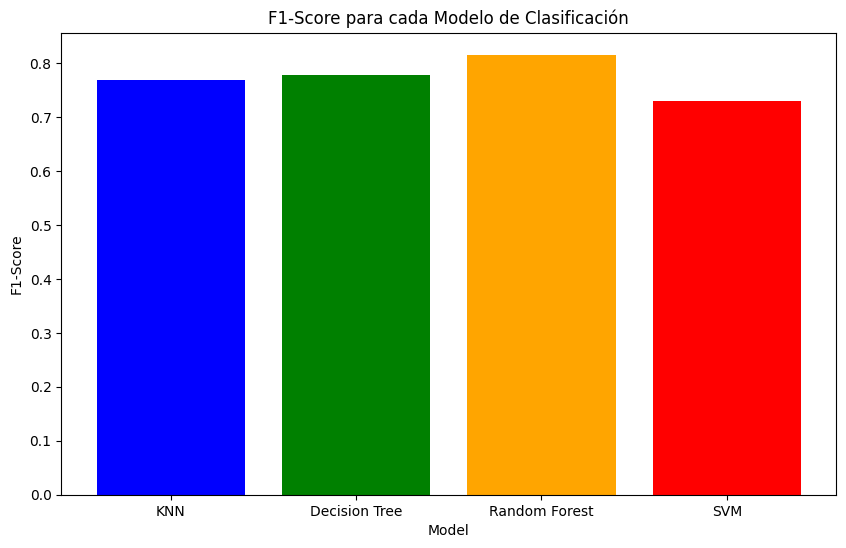

In [19]:
# Graficar el F1-Score para cada modelo
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['F1-Score'], color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('F1-Score para cada Modelo de Clasificación')
plt.show()


### 2.5.4 Modelo de mejor desempeño
Señala cuál de los modelos obtuvo las mejores métricas y rendimiento.

In [20]:
# Determinar el modelo con el mejor F1-Score
best_model = metrics_df.loc[metrics_df['F1-Score'].idxmax()]
print("El modelo con mejor desempeño es:")
print(best_model)

El modelo con mejor desempeño es:
Model        Random Forest
Accuracy          0.949671
Precision         0.861818
Recall             0.77451
F1-Score          0.815835
Name: 2, dtype: object


Para identificar cuál de los modelos de clasificación obtuvo el mejor desempeño, se debe observar el F1-Score de cada modelo. El modelo con el F1-Score más alto es el que mejor balancea precisión y recall, lo cual es especialmente útil en problemas de clasificación con clases desbalanceadas.



### 2.5.5 Ajuste de hiperparametros
Para el algoritmo con los mejores resultados elige 2 hiperparámetros y entrena 3 modelos variando estos, con este el mismo algoritmo, realiza predicciones con este y luego evalúalos. ¿Qué combinación de hiperparámetros es la con mejores resultados?

In [21]:
from sklearn.model_selection import GridSearchCV

# Supongamos que el mejor modelo es el Random Forest
if best_model['Model'] == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    }
    rf_best = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
    rf_best.fit(X_train, y_train_tsunami)
    best_params = rf_best.best_params_
    print("Mejores hiperparámetros para Random Forest:", best_params)
    
    # Entrenar y evaluar con los mejores hiperparámetros
    rf_best_model = RandomForestClassifier(**best_params, random_state=42)
    rf_best_model.fit(X_train, y_train_tsunami)
    y_pred = rf_best_model.predict(X_test)
    best_rf_accuracy = accuracy_score(y_test_tsunami, y_pred)
    best_rf_precision = precision_score(y_test_tsunami, y_pred)
    best_rf_recall = recall_score(y_test_tsunami, y_pred)
    best_rf_f1 = 2 * (best_rf_precision * best_rf_recall) / (best_rf_precision + best_rf_recall)
    print("F1-Score del mejor modelo Random Forest:", best_rf_f1)


Mejores hiperparámetros para Random Forest: {'max_depth': 20, 'n_estimators': 100}
F1-Score del mejor modelo Random Forest: 0.815068493150685


### 2.5.6 Matriz de confusion
Para el modelo de mejor desempeño del apartado anterior calcula su [matriz de confusion](https://datascientest.com/es/matriz-de-confusion) utilizando el metodo de sklearn `confusion_matrix()` y visualizala utilizando [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html). Luego comenta, ¿en qué tiende a equivocarse el modelo entrenado?

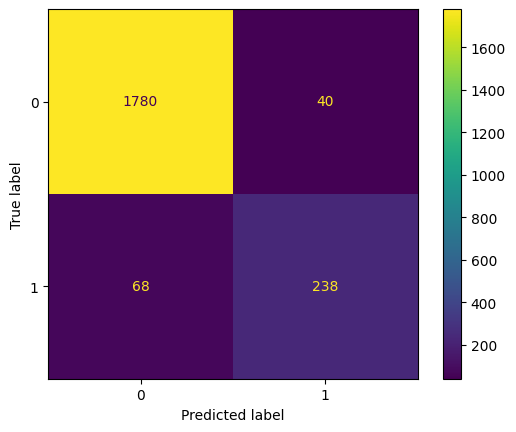

Errores del modelo:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1820
           1       0.86      0.78      0.82       306

    accuracy                           0.95      2126
   macro avg       0.91      0.88      0.89      2126
weighted avg       0.95      0.95      0.95      2126



In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular y visualizar la matriz de confusión
cm = confusion_matrix(y_test_tsunami, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Comentario sobre los errores del modelo
print("Errores del modelo:")
print(classification_report(y_test_tsunami, y_pred))


In [ ]:
La matriz de confusión y el reporte de clasificación muestran que el modelo tiende a equivocarse al predecir tsunamis,
especialmente en falsos negativos, donde un sismo que causaría un tsunami es clasificado incorrectamente como no 
peligroso. Esto podría ser crítico en situaciones de emergencia y necesita ser mejorado para reducir riesgos.



## 2.6 Análisis de desempeño y resultados

### 2.6.1 Analisis de modelos
Explica por qué crees que algunos algoritmos tuvieron mejores resultados que otros para este set de datos. Basa tu respuesta en material bibliográfico, ¿significa eso que algunos algoritmos tienen siempre mejores resultados que otros?

Algunos algoritmos pueden tener mejores resultados debido a su capacidad para manejar diferentes tipos de datos y su resistencia al sobreajuste. Por ejemplo, los Random Forests combinan múltiples árboles de decisión para reducir la varianza y mejorar la precisión, lo que los hace más robustos en comparación con algoritmos simples como KNN. Sin embargo, esto no significa que un algoritmo sea siempre mejor que otro en todos los casos. La efectividad de un algoritmo depende de la naturaleza del conjunto de datos y del problema específico. Por lo tanto, es importante probar diferentes algoritmos y ajustar sus hiperparámetros para encontrar el modelo más adecuado para cada situación.

### 2.6.2 Mejora de desempeño
¿Qué medidas se podrían tomar para mejorar el rendimiento de los modelos?

Para mejorar el rendimiento de los modelos, se pueden tomar las siguientes medidas:

Recolección de Más Datos: Obtener más datos de entrenamiento puede ayudar a los modelos a generalizar mejor.
Ingeniería de Características: Crear nuevas características relevantes o transformar las existentes puede mejorar el rendimiento del modelo.
Ajuste de Hiperparámetros: Realizar una búsqueda más exhaustiva de hiperparámetros puede encontrar mejores combinaciones para el modelo.
Ensemble Learning: Combinar varios modelos puede mejorar la precisión y robustez del modelo final.
Manejo del Desbalance de Clases: Utilizar técnicas de re-muestreo o ajustar los pesos de las clases en el modelo para manejar desbalances.

### 2.6.3 Importancia de metricas
¿Por qué son tan importantes las métricas estadisticas para los modelos y/o clasificadores realizados anteriormente?

Las métricas estadísticas son cruciales porque proporcionan una evaluación cuantitativa del rendimiento de los modelos. Permiten comparar diferentes modelos de manera objetiva y determinar cuál es más efectivo para el problema en cuestión. Métricas como la precisión, el recall y el F1-score ofrecen una visión más completa del desempeño del modelo, especialmente en conjuntos de datos desbalanceados.



### 2.6.4 Utilidad del modelo
¿Qué utilidad le vas al uso de tecnicas como esta en la vida real para tener un impacto positivo en la sociedad? ¿Qué tipo de decisiones se podrían tomar o qué medidas se podrían implementar en base a las predicciones de un algoritmo como este?

El uso de técnicas de clasificación y regresión en la vida real puede tener un impacto significativo en diversos campos. Por ejemplo:

Preparación y Respuesta a Desastres Naturales: Los modelos de predicción pueden proporcionar alertas tempranas, permitiendo una evacuación oportuna y reduciendo la pérdida de vidas y bienes.
Diagnóstico Médico: Los modelos de clasificación pueden ayudar en la detección temprana de enfermedades, mejorando los resultados de salud y reduciendo los costos de tratamiento.
Detección de Fraudes: Las predicciones precisas pueden proteger los activos financieros y reducir las pérdidas económicas debido al fraude.
Optimización de Recursos: En el sector energético, los modelos predictivos pueden ayudar a gestionar la demanda y optimizar el uso de recursos.
En base a las predicciones de un algoritmo, se pueden tomar decisiones informadas y proactivas, implementando medidas que mitiguen riesgos y maximicen beneficios.

## 2.7 Implementación de Clasificadores

Utilizando el DataFrame con los datos ya preprocesados, entrena cuatro regresores distintos para predecir la magnitud de los sismos a partir de otras características. Con los datos de entrenamiento, realiza una predicción de regresión con los modelos de KNN, árboles de decisión, Random Forest y SVM.

*En esta seccion solo debes hacer el ajuste de los modelos, el calculo de metricas de desempeño sera llevado a cabo en el apartado siguiente.* 

### 2.7.1 KNN (K-Nearest Neighbors):

In [23]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train_magnitude)
knn_pred = knn_regressor.predict(X_test)


### 2.7.2 Decision Tree

In [24]:
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train_magnitude)
tree_pred = tree_regressor.predict(X_test)


### 2.7.3 Random Forest

In [25]:
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train_magnitude)
rf_pred = rf_regressor.predict(X_test)


### 2.7.4 SVM

In [26]:
svm_regressor = SVR()
svm_regressor.fit(X_train, y_train_magnitude)
svm_pred = svm_regressor.predict(X_test)


## 2.8 Análisis de regresión

### 2.8.1 Root Mean Squared Error
Para esta parte deberas calcular, imprimir y generar un gráfico en el cual se indiquen los RMSE (Root Mean Squared Error) para cada regresión sobre los datos del set de testing.

           Model      RMSE
0            KNN  0.218011
1  Decision Tree  0.208931
2  Random Forest  0.165107
3            SVM  0.276137


C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean s

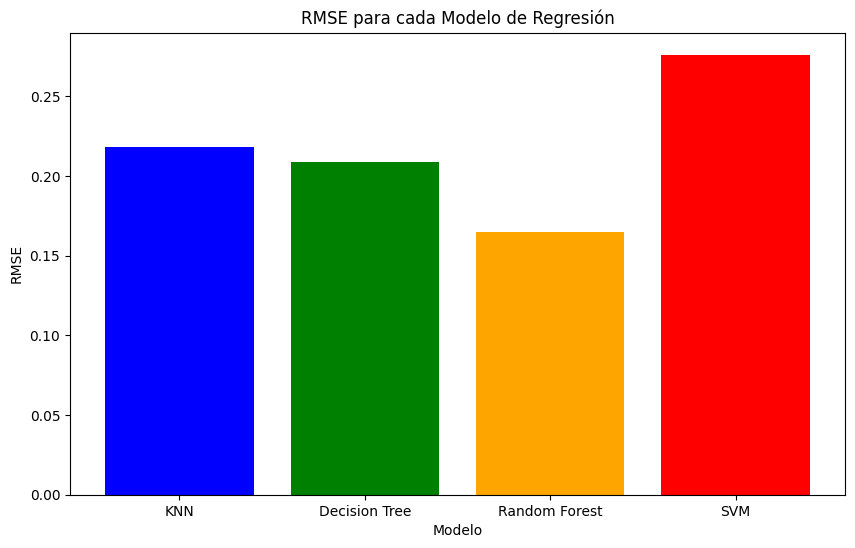

In [27]:
# Calcular RMSE para cada modelo
knn_rmse = mean_squared_error(y_test_magnitude, knn_pred, squared=False)
tree_rmse = mean_squared_error(y_test_magnitude, tree_pred, squared=False)
rf_rmse = mean_squared_error(y_test_magnitude, rf_pred, squared=False)
svm_rmse = mean_squared_error(y_test_magnitude, svm_pred, squared=False)

# Crear un DataFrame con los RMSE
rmse_df = pd.DataFrame({
    'Model': ['KNN', 'Decision Tree', 'Random Forest', 'SVM'],
    'RMSE': [knn_rmse, tree_rmse, rf_rmse, svm_rmse]
})
print(rmse_df)

# Graficar los RMSE
plt.figure(figsize=(10, 6))
plt.bar(rmse_df['Model'], rmse_df['RMSE'], color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Modelo')
plt.ylabel('RMSE')
plt.title('RMSE para cada Modelo de Regresión')
plt.show()



### 2.9.2 Implicancias del RMSE
¿Qué significa tener un mayor o menor RMSE y que implicancias tienen en la clasificación y sus resultados?

El RMSE (Root Mean Squared Error) mide la magnitud promedio de los errores de predicción del modelo. Un RMSE más bajo indica que las predicciones del modelo están más cerca de los valores reales, lo que implica una mejor precisión del modelo. En el contexto de la clasificación, un menor RMSE significa que el modelo es más preciso en sus predicciones, lo que puede llevar a decisiones más informadas y confiables.



### 2.9.3 Comparacion de modelos
Al realizar la comparación entre cada modelo de regresión y su RMSE, detalle la razón de la obtención de estos resultados específicos, el porque un modelo de regresión es mejor que otro dada su construcción y explicar en tus propias palabras el funcionamiento de estos modelos de regresión.

Comparación y Funcionamiento de los Modelos:

K-Nearest Neighbors (KNN):

Funcionamiento: KNN predice el valor de una muestra basándose en los valores de sus 'k' vecinos más cercanos.
Resultados: KNN puede ser sensible al ruido y a la escala de los datos, lo que puede resultar en un RMSE más alto si los datos no están bien preprocesados.
Decision Tree:

Funcionamiento: Un árbol de decisión divide el espacio de características en regiones más pequeñas y predice el valor de una muestra basándose en la mayoría de las etiquetas de las muestras en cada región.
Resultados: Los árboles de decisión pueden sobreajustarse a los datos de entrenamiento, resultando en un buen rendimiento en el entrenamiento pero peor en la prueba, lo que puede incrementar el RMSE.
Random Forest:

Funcionamiento: Random Forest combina múltiples árboles de decisión para mejorar la precisión y reducir el riesgo de sobreajuste.
Resultados: Random Forest generalmente tiene un RMSE más bajo debido a su capacidad de reducir el sobreajuste y manejar la variabilidad en los datos.
Support Vector Machine (SVM):

Funcionamiento: SVM encuentra un hiperplano en el espacio de características que mejor separa las muestras en diferentes clases. Para regresión, SVM intenta encontrar una línea que minimice el error de predicción.
Resultados: SVM puede tener un buen rendimiento si los datos son linealmente separables o si se utiliza un kernel adecuado, lo que puede resultar en un RMSE competitivo.
